In [106]:
import numpy as np
import matplotlib.pyplot as plt
from turtle import speed

In [107]:
class Ball():
    
    def __init__(self, gravitation=-9.81,speed_y=0, pos_y=1000, cor = 1) -> None:
        self.gravitation = gravitation # m/s2
        self.speed_y = speed_y # m/s
        self.pos_y = pos_y # m
        self.cor = cor # coefficient_of_restitution
        self.collision_counter = 0

    def update_speed_y(self, dt):
        self.speed_y =  self.gravitation * dt + self.speed_y

    def update_pos_y_without_collision(self, dt):
        self.update_speed_y(dt)
        self.pos_y = self.gravitation/2*np.power(dt,2) + self.speed_y * dt + self.pos_y # m
        return self.pos_y

    def update_pos_y(self, dt, boundary):
        prev_speed_y = self.speed_y
        prev_pos_y = self.pos_y
        self.update_speed_y(dt)
        self.pos_y = self.gravitation/2*np.power(dt,2) + self.speed_y * dt + self.pos_y # m

        if self.is_collision(boundary):
            #(self.pos_y - prev_pos_y)*dt + prev_pos_y = boundary.y # linear equasion
            dt_collision = ((boundary.y - prev_pos_y)/(self.pos_y - prev_pos_y))*dt
            self.speed_y = prev_speed_y # reset
            self.pos_y = prev_pos_y # reset
            self.update_speed_y(dt_collision)
            self.pos_y = boundary.y
            #self.pos_y = self.gravitation/2*np.power(dt_collision,2) + self.speed_y * dt_collision + self.pos_y # m

            self.speed_y = -self.speed_y*self.cor # bounce reverses speed
            self.update_speed_y(dt-dt_collision)
            self.pos_y = self.gravitation/2*np.power((dt-dt_collision),2) + self.speed_y * (dt-dt_collision) + self.pos_y # m

            if self.speed_y < 0: # ball has not enough energy cross border
                self.speed_y = 0
                self.pos_y = boundary.y
                
            self.collision_counter = self.collision_counter + 1

            return self.pos_y
            
        else:
            return self.pos_y

    def is_collision(self, boundary):
        return boundary.y > self.pos_y

In [108]:
class Boundary():
    
    def __init__(self, y) -> None:
        self.y = y

In [109]:
fps = 100
dt = 1/fps
collisions = 3

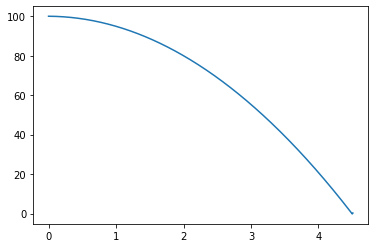

In [110]:
pos_y_history = []

ball = Ball(gravitation=-9.81, speed_y=0, pos_y=100, cor=1)
floor = Boundary(0)
collision = False
counter = 0

while(counter<collisions):
    if collision:
        ball.speed_y = -ball.speed_y*ball.cor

        while(collision):
            pos_y_now = ball.update_pos_y_without_collision(dt)
            pos_y_history.append(pos_y_now)
            collision = ball.is_collision(floor)

            if ball.speed_y < 0: # ball has not enough energy cross border
                break

        counter += 1
        collision = False

    else:
        pos_y_now = ball.update_pos_y_without_collision(dt)
        collision = ball.is_collision(floor)
        pos_y_history.append(pos_y_now)

td_acc_history = np.arange(0, len(pos_y_history))*dt

pos_y_history
plt.plot(td_acc_history, pos_y_history)

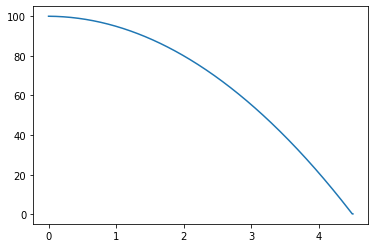

In [111]:
pos_y_history = []

ball = Ball(gravitation=-9.81, speed_y=0, pos_y=100, cor=1)
floor = Boundary(0)

while(ball.collision_counter<collisions):
        pos_y_now = ball.update_pos_y(dt, floor)
        #print(pos_y_now)
        #print(ball.collision_counter)
        pos_y_history.append(pos_y_now)

td_acc_history = np.arange(0, len(pos_y_history))*dt

pos_y_history
plt.plot(td_acc_history, pos_y_history)